<a href="https://colab.research.google.com/github/axviolyn/Data-Mining/blob/main/Praktikum3Mandiri_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Mengimport dan menampilkan dataset

import pandas as pd
import numpy as np

data_obesity = pd.read_csv('/content/drive/MyDrive/DatasetDM/Obesity_classification.csv')
data_obesity


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [5]:
# Melihat datatype dan spesifik pada dataset

data_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [7]:
#  Menghitung rata-rata, min, max, dll dengan statistik deskiptif

data_obesity.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [8]:
#  Mengecek apakah ada missing value

data_obesity.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [10]:
# Menjadikan ID sebagai index agar memudahkan mengambil sebuah data

data_obesity.set_index('ID', inplace=True)
data_obesity

,Age,Gender,Height,Weight,BMI,Label
ID,,,,,,
1,25,Male,175,80,25.3,Normal Weight
2,30,Female,160,60,22.5,Normal Weight
3,35,Male,180,90,27.3,Overweight
4,40,Female,150,50,20.0,Underweight
5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
106,11,Male,175,10,3.9,Underweight
107,16,Female,160,10,3.9,Underweight
108,21,Male,180,15,5.6,Underweight


In [11]:
# Remaining columns

data_obesity.rename(columns={
    'Age':'Umur',
    'Height':'Tinggi Badan',
    'Weight':'Berat Badan',
    'BMI' : 'BMI',
    'Label' : 'Label'
}, inplace=True)

data_obesity

,Umur,Gender,Tinggi Badan,Berat Badan,BMI,Label
ID,,,,,,
1,25,Male,175,80,25.3,Normal Weight
2,30,Female,160,60,22.5,Normal Weight
3,35,Male,180,90,27.3,Overweight
4,40,Female,150,50,20.0,Underweight
5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
106,11,Male,175,10,3.9,Underweight
107,16,Female,160,10,3.9,Underweight
108,21,Male,180,15,5.6,Underweight


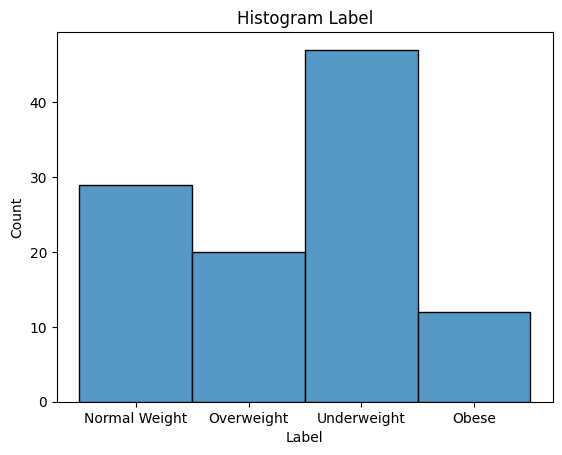

In [31]:
# Visualisasi data dengan histogram

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=data_obesity['Label'])
plt.title('Histogram Label')
plt.show()

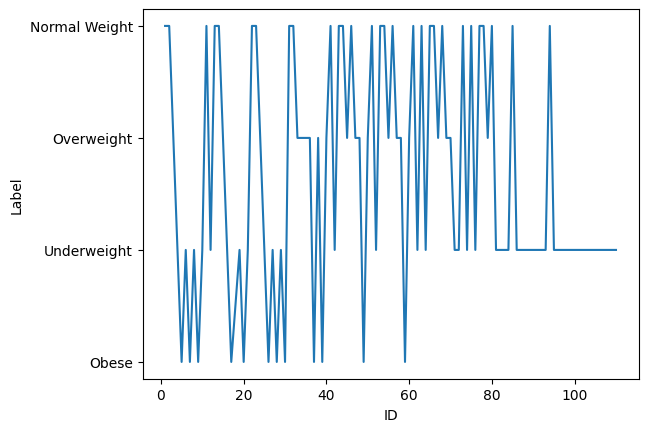

In [29]:
# Visualisasi data dengan line chart

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=data_obesity['Label'])
plt.show()

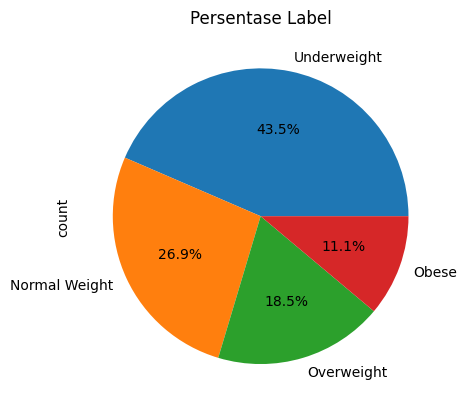

In [18]:
# Visualisasi dengan pie chart

data_obesity['Label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Persentase Label')
plt.show()

In [22]:
# Melakukan normalisasi pada data numerik
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom-kolom numerik yang akan dinormalisasi
numeric_cols = ['Umur', 'Tinggi Badan', 'Berat Badan', 'BMI', ]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan fit dan transformasi pada data numerik
df_normalized = data_obesity.copy()
df_normalized[numeric_cols] = scaler.fit_transform(data_obesity[numeric_cols])

# Menampilkan data setelah dinormalisasi
df_normalized.head()

,Umur,Gender,Tinggi Badan,Berat Badan,BMI,Label
ID,,,,,,
1,0.138614,Male,0.611111,0.636364,0.642643,Normal Weight
2,0.188119,Female,0.444444,0.454545,0.558559,Normal Weight
3,0.237624,Male,0.666667,0.727273,0.702703,Overweight
4,0.287129,Female,0.333333,0.363636,0.483483,Underweight
5,0.336634,Male,0.777778,0.818182,0.819820,Obese


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Memilih kolom numerik
numeric_cols = ['Umur', 'Tinggi Badan', 'Berat Badan', 'BMI']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Menerapkan Z-Score transformation
data_obesity[numeric_cols] = scaler.fit_transform(data_obesity[numeric_cols])

# Menampilkan data setelah Z-Score transformation
print(data_obesity[numeric_cols].head())

        Umur  Tinggi Badan  Berat Badan       BMI
ID                                               
1  -0.876032      0.303700     0.714053  0.629376
2  -0.672829     -0.236952     0.017730  0.258448
3  -0.469625      0.483917     1.062214  0.894325
4  -0.266422     -0.597387    -0.330431 -0.072738
5  -0.063219      0.844352     1.410375  1.410975


In [27]:
import numpy as np

# Menentukan faktor penggeseran (scaling factor)
scaling_factor = 1.5

# Melakukan transformasi decimal scaling
data_obesity['Umur'] = data_obesity['Umur'] * scaling_factor
data_obesity['Tinggi Badan'] = data_obesity['Tinggi Badan'] * scaling_factor

print("Data asli")
print(data_obesity)

print("\nData setelah transformasi decimal scaling")
print(data_obesity)

Data asli
         Umur  Gender  Tinggi Badan  Berat Badan       BMI          Label
ID                                                                       
1   -1.314048    Male      0.455550     0.714053  0.629376  Normal Weight
2   -1.009243  Female     -0.355429     0.017730  0.258448  Normal Weight
3   -0.704438    Male      0.725876     1.062214  0.894325     Overweight
4   -0.399633  Female     -0.896081    -0.330431 -0.072738    Underweight
5   -0.094828    Male      1.266528     1.410375  1.410975          Obese
..        ...     ...           ...          ...       ...            ...
106 -2.167501    Male      0.455550    -1.723076 -2.205577    Underweight
107 -1.862696  Female     -0.355429    -1.723076 -2.205577    Underweight
108 -1.557892    Male      0.725876    -1.548995 -1.980370    Underweight
109 -1.253087  Female     -0.896081    -1.548995 -1.980370    Underweight
110 -0.948282    Male      1.266528    -1.374914 -1.622689    Underweight

[108 rows x 6 columns]

Dat